### 텐서플로우 소개 사용법
    1. 딥러닝 프레임워크
    1. 텐서플로우의 특징

####  텐서플로우의 특징
* 텐서플로우는 풍부한 코드 수정없이 CPU, GPU모드로 동작 가능하다.
* 많은 데이터 처리가 가능하다 (이미지, 비디오, 음성)

// 텐선플로우도 좋아보이지만 파이토치도 좋아보인다.(언젠간 파이토치 써보자.)

#### Eager Execution
Eager Execution은 데이터를 직접 포인팅함. tf.session을 할 필요가 없음

Nmumpy와 호환성을 크게 높여 계산 그래프의 생성과 실행단계가 구분되지 않음
https://tensorflow.blog/2017/11/01/tensorflow-eager-execution/

#### Sequantial 모델
![sequencial](https://user-images.githubusercontent.com/50629716/62408473-a4a65780-b604-11e9-844e-5b836ae98b07.PNG)


In [87]:
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow.keras import layers
import numpy as np
import tensorflow as tf


training_data =np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
target_data = np.array([[0],[1],[1],[0]], 'float32')
print(training_data)

model = tf.keras.Sequential() #Sequential모델 사용
model.add(layers.Dense(16, input_dim=2,activation='relu')) #레이어 추가
model.add(layers.Dense(1,activation = 'sigmoid'))

model.compile(loss='mse',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data,target_data,nb_epoch=20)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]


W0803 19:23:09.444720 29540 training.py:593] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
4/4 [==============================] - 0s 42ms/sample - loss: 0.2326 - binary_accuracy: 0.7500
Epoch 2/20
4/4 [==============================] - 0s 499us/sample - loss: 0.2323 - binary_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 0s 530us/sample - loss: 0.2320 - binary_accuracy: 0.7500
Epoch 4/20
4/4 [==============================] - 0s 397us/sample - loss: 0.2316 - binary_accuracy: 0.7500
Epoch 5/20
4/4 [==============================] - 0s 898us/sample - loss: 0.2312 - binary_accuracy: 0.7500
Epoch 6/20
4/4 [==============================] - 0s 660us/sample - loss: 0.2309 - binary_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 0s 498us/sample - loss: 0.2305 - binary_accuracy: 0.7500
Epoch 8/20
4/4 [==============================] - 0s 556us/sample - loss: 0.2302 - binary_accuracy: 0.7500
Epoch 9/20
4/4 [==============================] - 0s 748us/sample - loss: 0.2299 - binary_accuracy: 0.7500
Epoch 10/20
4/4 [=====================

In [171]:
#Tensorflow 데이터 생성 정리
#어째서 인지 주피터 노트북 에서는 eager execution이 활성화 되지 않는다.. 파이참은 되는데 뭐지..찾아본 결과 뭐 처음에 실행시켜주어야 작동 된다는데 자세하게는 잘 모르겠다..
import tensorflow as tf
import numpy as np
a = tf.constant(5) #
b = tf.constant(6) # 변수 정의 해주기

# tf.(zeros,ones,fill)([형태], dtype = tf.float32, name = '')
c = tf.zeros([3,3])
d = tf.ones([2,2])
e = tf.fill([2,2],4) # 2행 2열 4값으로 채워진 벡터 생성

#tf.(linspace, range)
f = tf.linspace(1.,12.,12) #(시작, 끝, num)
#여기서 num이 좀 애매함 stop-start / num-1 씩 증가 라는데
#시작과 끝은 소수점 이후의 값이 나오기 때문에 float만 해야함
g = tf.range(1.,10.,3.) #(시작, 끝값, 증가량)

#난수 설정
seed = tf.compat.v1.set_random_seed(100) # 난수 시드 
h = tf.random.normal([4,4],mean = 0.0, seed = 100)
#mean 정규분포의 평균값 stddev 정규분포의 표준편차
i = tf.random.uniform([4,4], minval = 0, maxval = 5, seed = 99)

weight = tf.Variable(5, name = 'weight')
bias = tf.Variable(-3, name = 'bias')

model = tf.global_variables_initializer() #모델 내부 변수 초기화
with tf.Session() as session: # 값을 계산하기 위해 세션 생성
    session.run(model) #모델 실행
    for i in [a,b,c,d,e,f,g,h,i,weight,bias]:
        print(session.run(i))

5
6
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1.]
 [1. 1.]]
[[4 4]
 [4 4]]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[1. 4. 7.]
[[-0.6302907  -0.60320675  0.27576178  1.0577745 ]
 [-1.582675    0.17781347  1.393748    0.9763359 ]
 [ 1.1037626   0.35999718 -1.500011   -0.37304452]
 [-1.7591183   0.5099418   1.4773684  -0.19108514]]
[[4.0623     3.9540453  1.4769673  1.1680645 ]
 [0.69802046 3.1836324  3.201098   4.7670317 ]
 [2.533697   1.0999995  1.6479516  3.0498147 ]
 [1.542241   1.3250023  1.2934405  2.0342922 ]]
5
-3
11


1.14.0
[-0.84359884]
Step : 0| Weight : -0.52056| Bias : -3.91266| Cost : 76.43867
Step : 15| Weight : 1.50980| Bias : -3.26279| Cost : 3.52445
Step : 30| Weight : 1.79838| Bias : -3.09755| Cost : 1.76820
Step : 45| Weight : 1.82396| Bias : -3.00730| Cost : 1.64450
Step : 60| Weight : 1.81021| Bias : -2.93003| Cost : 1.56228
Step : 75| Weight : 1.79095| Bias : -2.85632| Cost : 1.48494
Step : 90| Weight : 1.77128| Bias : -2.78470| Cost : 1.41145
Step : 105| Weight : 1.75198| Bias : -2.71491| Cost : 1.34160
Step : 120| Weight : 1.73314| Bias : -2.64687| Cost : 1.27520
Step : 135| Weight : 1.71477| Bias : -2.58054| Cost : 1.21209
Step : 150| Weight : 1.69686| Bias : -2.51588| Cost : 1.15210
Step : 165| Weight : 1.67939| Bias : -2.45283| Cost : 1.09509
Step : 180| Weight : 1.66237| Bias : -2.39136| Cost : 1.04089
Step : 195| Weight : 1.64577| Bias : -2.33144| Cost : 0.98937
[5.891363]
[1.7878253]


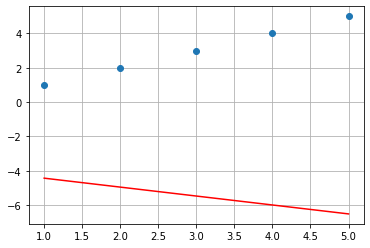

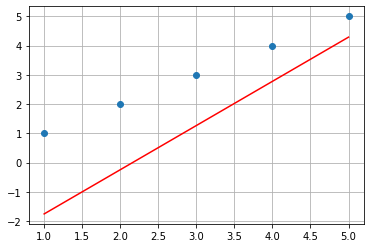

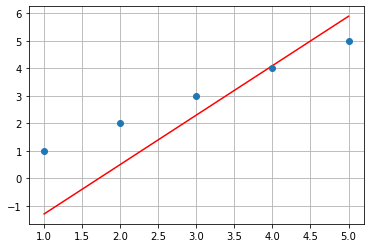

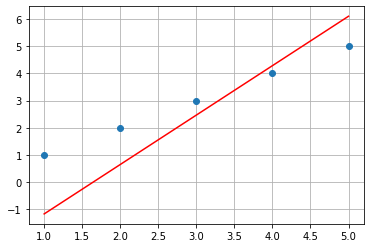

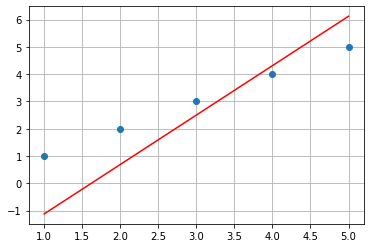

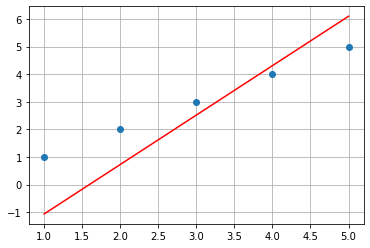

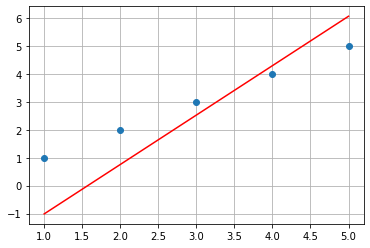

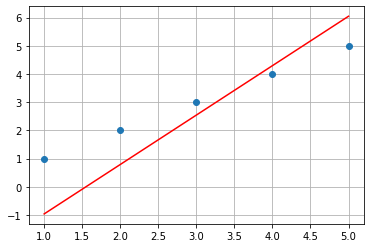

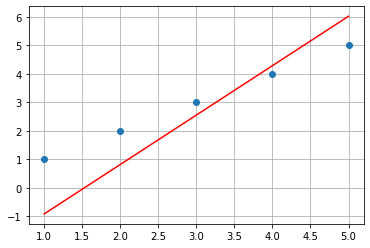

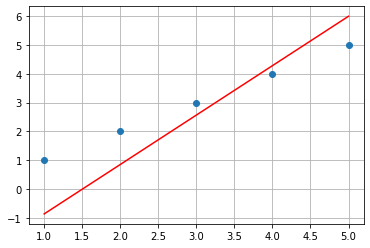

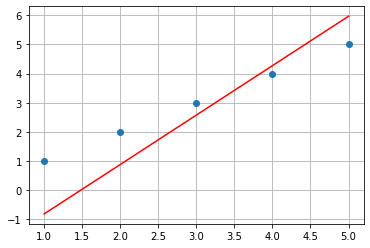

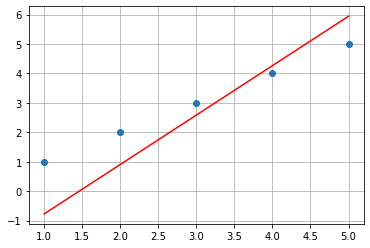

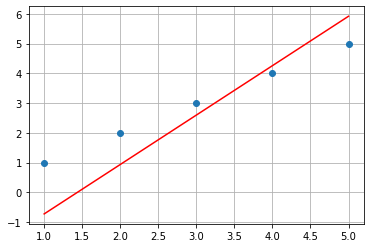

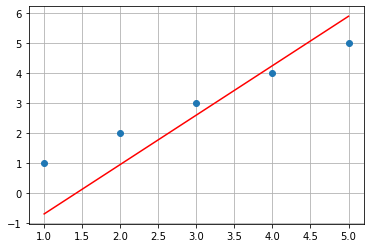

In [193]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Tensorflow 1.8 Version
print(tf.__version__)

# 시각화 함수
def Visualize(x_data, y_data, hypothesis):
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(x_data, hypothesis, 'r-')
    ax.plot(x_data, y_data, 'o')

# 선형 데이터 x, y 선언
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# 학습에 사용할 Weight, Bias 선언
W = tf.Variable(tf.random_uniform([1], -5.0, 5.0))
b = tf.Variable(tf.random_uniform([1], -5.0, 5.0))
# 입력이 들어갈 Placeholder (Input Node) 선언
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Cost 함수 설계
hypothesis = W * X + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 학습 속도, Cost (Loss)를 줄여나가는 방법을 정하고 Optimizer를 선언합니다.
learning_rate = 0.005
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

# Session을 열어줍니다.
sess = tf.Session()

# Session 내의 전체 변수를 초기화
sess.run(tf.initializers.global_variables())
print(sess.run(W))
# 200번 학습 진행
for i in range(200):
    # Train 객체에 학습 데이터 x_data와 Label 값 y_data를 입력합니다.
    # 입력은 feed_dict로 딕셔너리 형태의 입력이 들어갑니다.
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if i % 15 == 0:
        Visualize(x_data, y_data, sess.run(hypothesis, feed_dict = {X : x_data}))
        print("Step : {}| Weight : {:.5f}| Bias : {:.5f}| Cost : {:.5f}".format(i,float(sess.run(W)), float(sess.run(b)), float(sess.run(cost, feed_dict={X: x_data, Y: y_data}))))

# Iteration이 끝나면 학습이 끝났습니다.        
# 이제 검증 데이터로 학습된 hypothesis 성능을 평가합니다.
print(sess.run(hypothesis, feed_dict = {X : 5}))
print(sess.run(hypothesis, feed_dict = {X : 2.5}))

# 연산이 전부 끝났으면 Session을 닫아줍니다.
sess.close()

Epoch 1/500
10/10 [==============================] - 0s 34ms/sample - loss: 5.9144 - mean_squared_error: 5.9144 - binary_crossentropy: 9.2292
Epoch 2/500
10/10 [==============================] - 0s 156us/sample - loss: 5.8184 - mean_squared_error: 5.8184 - binary_crossentropy: 6.9420
Epoch 3/500
10/10 [==============================] - 0s 298us/sample - loss: 5.7355 - mean_squared_error: 5.7355 - binary_crossentropy: 6.0099
Epoch 4/500
10/10 [==============================] - 0s 423us/sample - loss: 5.6559 - mean_squared_error: 5.6559 - binary_crossentropy: 5.3681
Epoch 5/500
10/10 [==============================] - 0s 358us/sample - loss: 5.5746 - mean_squared_error: 5.5746 - binary_crossentropy: 4.8526
Epoch 6/500
10/10 [==============================] - 0s 334us/sample - loss: 5.4914 - mean_squared_error: 5.4914 - binary_crossentropy: 4.4170
Epoch 7/500
10/10 [==============================] - 0s 364us/sample - loss: 5.4129 - mean_squared_error: 5.4129 - binary_crossentropy: 4.0614


Epoch 58/500
10/10 [==============================] - 0s 203us/sample - loss: 0.3328 - mean_squared_error: 0.3328 - binary_crossentropy: -16.7816
Epoch 59/500
10/10 [==============================] - 0s 383us/sample - loss: 0.3109 - mean_squared_error: 0.3109 - binary_crossentropy: -16.7816
Epoch 60/500
10/10 [==============================] - 0s 503us/sample - loss: 0.2952 - mean_squared_error: 0.2952 - binary_crossentropy: -16.7816
Epoch 61/500
10/10 [==============================] - 0s 441us/sample - loss: 0.2855 - mean_squared_error: 0.2855 - binary_crossentropy: -16.7816
Epoch 62/500
10/10 [==============================] - 0s 800us/sample - loss: 0.2806 - mean_squared_error: 0.2806 - binary_crossentropy: -16.7816
Epoch 63/500
10/10 [==============================] - 0s 661us/sample - loss: 0.2794 - mean_squared_error: 0.2794 - binary_crossentropy: -16.7816
Epoch 64/500
10/10 [==============================] - 0s 367us/sample - loss: 0.2812 - mean_squared_error: 0.2812 - binary_c

Epoch 115/500
10/10 [==============================] - 0s 0s/sample - loss: 0.1339 - mean_squared_error: 0.1339 - binary_crossentropy: -17.0649
Epoch 116/500
10/10 [==============================] - 0s 414us/sample - loss: 0.1312 - mean_squared_error: 0.1312 - binary_crossentropy: -17.0754
Epoch 117/500
10/10 [==============================] - 0s 311us/sample - loss: 0.1286 - mean_squared_error: 0.1286 - binary_crossentropy: -17.0828
Epoch 118/500
10/10 [==============================] - 0s 398us/sample - loss: 0.1259 - mean_squared_error: 0.1259 - binary_crossentropy: -17.0883
Epoch 119/500
10/10 [==============================] - 0s 520us/sample - loss: 0.1233 - mean_squared_error: 0.1233 - binary_crossentropy: -17.0928
Epoch 120/500
10/10 [==============================] - 0s 409us/sample - loss: 0.1208 - mean_squared_error: 0.1208 - binary_crossentropy: -17.3579
Epoch 121/500
10/10 [==============================] - 0s 177us/sample - loss: 0.1182 - mean_squared_error: 0.1182 - bina

Epoch 171/500
10/10 [==============================] - 0s 401us/sample - loss: 0.0501 - mean_squared_error: 0.0501 - binary_crossentropy: -18.0182
Epoch 172/500
10/10 [==============================] - 0s 407us/sample - loss: 0.0498 - mean_squared_error: 0.0498 - binary_crossentropy: -18.0186
Epoch 173/500
10/10 [==============================] - 0s 100us/sample - loss: 0.0495 - mean_squared_error: 0.0495 - binary_crossentropy: -18.0190
Epoch 174/500
10/10 [==============================] - 0s 431us/sample - loss: 0.0492 - mean_squared_error: 0.0492 - binary_crossentropy: -18.0193
Epoch 175/500
10/10 [==============================] - 0s 574us/sample - loss: 0.0489 - mean_squared_error: 0.0489 - binary_crossentropy: -18.0196
Epoch 176/500
10/10 [==============================] - 0s 310us/sample - loss: 0.0486 - mean_squared_error: 0.0486 - binary_crossentropy: -18.0200
Epoch 177/500
10/10 [==============================] - 0s 615us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - b

Epoch 227/500
10/10 [==============================] - 0s 422us/sample - loss: 0.0362 - mean_squared_error: 0.0362 - binary_crossentropy: -18.0221
Epoch 228/500
10/10 [==============================] - 0s 212us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - binary_crossentropy: -18.0222
Epoch 229/500
10/10 [==============================] - 0s 299us/sample - loss: 0.0356 - mean_squared_error: 0.0356 - binary_crossentropy: -18.0223
Epoch 230/500
10/10 [==============================] - 0s 231us/sample - loss: 0.0353 - mean_squared_error: 0.0353 - binary_crossentropy: -18.0224
Epoch 231/500
10/10 [==============================] - 0s 401us/sample - loss: 0.0350 - mean_squared_error: 0.0350 - binary_crossentropy: -18.0224
Epoch 232/500
10/10 [==============================] - 0s 441us/sample - loss: 0.0347 - mean_squared_error: 0.0347 - binary_crossentropy: -18.0225
Epoch 233/500
10/10 [==============================] - 0s 334us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - b

Epoch 283/500
10/10 [==============================] - 0s 406us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - binary_crossentropy: -18.0268
Epoch 284/500
10/10 [==============================] - 0s 407us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - binary_crossentropy: -18.0268
Epoch 285/500
10/10 [==============================] - 0s 321us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - binary_crossentropy: -18.0270
Epoch 286/500
10/10 [==============================] - 0s 591us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - binary_crossentropy: -18.0271
Epoch 287/500
10/10 [==============================] - 0s 270us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - binary_crossentropy: -18.0272
Epoch 288/500
10/10 [==============================] - 0s 415us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - binary_crossentropy: -18.0272
Epoch 289/500
10/10 [==============================] - 0s 104us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - b

Epoch 339/500
10/10 [==============================] - 0s 472us/sample - loss: 0.0094 - mean_squared_error: 0.0094 - binary_crossentropy: -18.0310
Epoch 340/500
10/10 [==============================] - 0s 405us/sample - loss: 0.0092 - mean_squared_error: 0.0092 - binary_crossentropy: -18.0311
Epoch 341/500
10/10 [==============================] - 0s 403us/sample - loss: 0.0091 - mean_squared_error: 0.0091 - binary_crossentropy: -18.0311
Epoch 342/500
10/10 [==============================] - 0s 510us/sample - loss: 0.0090 - mean_squared_error: 0.0090 - binary_crossentropy: -18.0312
Epoch 343/500
10/10 [==============================] - 0s 400us/sample - loss: 0.0089 - mean_squared_error: 0.0089 - binary_crossentropy: -18.0313
Epoch 344/500
10/10 [==============================] - 0s 412us/sample - loss: 0.0088 - mean_squared_error: 0.0088 - binary_crossentropy: -18.0313
Epoch 345/500
10/10 [==============================] - 0s 402us/sample - loss: 0.0086 - mean_squared_error: 0.0086 - b

Epoch 395/500
10/10 [==============================] - 0s 307us/sample - loss: 0.0054 - mean_squared_error: 0.0054 - binary_crossentropy: -18.0335
Epoch 396/500
10/10 [==============================] - 0s 318us/sample - loss: 0.0054 - mean_squared_error: 0.0054 - binary_crossentropy: -18.0335
Epoch 397/500
10/10 [==============================] - 0s 326us/sample - loss: 0.0053 - mean_squared_error: 0.0053 - binary_crossentropy: -18.0335
Epoch 398/500
10/10 [==============================] - 0s 576us/sample - loss: 0.0053 - mean_squared_error: 0.0053 - binary_crossentropy: -18.0336
Epoch 399/500
10/10 [==============================] - 0s 564us/sample - loss: 0.0052 - mean_squared_error: 0.0052 - binary_crossentropy: -18.0336
Epoch 400/500
10/10 [==============================] - 0s 409us/sample - loss: 0.0052 - mean_squared_error: 0.0052 - binary_crossentropy: -18.0336
Epoch 401/500
10/10 [==============================] - 0s 243us/sample - loss: 0.0051 - mean_squared_error: 0.0051 - b

Epoch 451/500
10/10 [==============================] - 0s 535us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - binary_crossentropy: -18.0347
Epoch 452/500
10/10 [==============================] - 0s 449us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - binary_crossentropy: -18.0347
Epoch 453/500
10/10 [==============================] - 0s 203us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - binary_crossentropy: -18.0347
Epoch 454/500
10/10 [==============================] - 0s 100us/sample - loss: 0.0031 - mean_squared_error: 0.0031 - binary_crossentropy: -18.0348
Epoch 455/500
10/10 [==============================] - 0s 237us/sample - loss: 0.0030 - mean_squared_error: 0.0030 - binary_crossentropy: -18.0348
Epoch 456/500
10/10 [==============================] - 0s 239us/sample - loss: 0.0030 - mean_squared_error: 0.0030 - binary_crossentropy: -18.0348
Epoch 457/500
10/10 [==============================] - 0s 421us/sample - loss: 0.0029 - mean_squared_error: 0.0029 - b

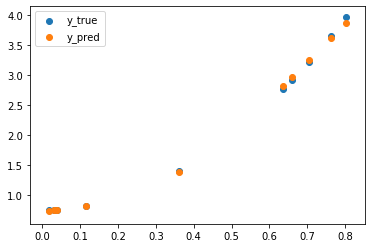

In [210]:
# Tensorflow + Keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 임의의 데이터 x, y를 선언합니다.
x = np.random.rand(10,1) # 0부터 1사이 균일분포하게 난수 생성한다. 100행 1열
y = 5 * x**2 + 3 * np.random.rand(1) # y는 X를 이용해 규칙을 주어서 생성

#Sequential하게 모델 선언 layers 쌓기 까지
model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape = (1, )),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse',metrics = ['mse','binary_crossentropy'])

history = model.fit(x,y, epochs = 500, batch_size = 100)

# 결과 출력
plt.scatter(x, y, label='y_true')
plt.scatter(x, model.predict(x), label='y_pred')
plt.legend()